# Slight warning, I found out you could put those little text emoji things in here, so be prepared for that  ●‿●

##### Dataset can be found here:
https://www.kaggle.com/jessemostipak/animal-crossing?select=user_reviews.csv

####
#### Reference for sentiment analysis:
https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

In [11]:
import pandas as pd
import seaborn as sns
import nltk


In [12]:
users = pd.read_csv("user_reviews.csv")
users

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20
...,...,...,...,...
2994,1,TakezoShinmen,1 Island for console limitation.I cannot play ...,2020-05-03
2995,1,Pikey17,"Per giocare con figli o fidanzate, mogli o per...",2020-05-03
2996,0,Lemmeadem,One island per console is a pathetic limitatio...,2020-05-03
2997,2,TandemTester938,Even though it seems like a great game with ma...,2020-05-03


In [13]:
users.grade.value_counts()

0     1158
10     752
1      255
9      253
2      131
4      105
3       98
8       91
5       78
6       44
7       34
Name: grade, dtype: int64

In [14]:
users.dropna(inplace = True)

In [15]:
users.shape

(2999, 4)

## Let's start exploring! ヽ( ´ ∇ ｀ )ノ Lets look at the user reviews and see how the scores are distributed with chart. 

In [16]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.histogram(users, x="grade")
fig.update_traces(marker_color="tan",marker_line_color='teal',
                  marker_line_width=1.5)
fig.update_layout(title_text='Users Scores')
fig.show()

## With how big ACNH is (or was), I didn't think it would be that bad, but still plenty of good reviews which is good for the creaters spirit in the long run ≧◡≦

## Now on to some word clouds to see what people are saying.

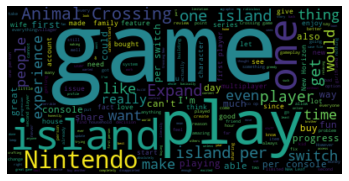

In [17]:
from nltk.corpus import stopwords
from wordcloud import WordCloud 

stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
text = " ".join(review for review in users.text)
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Game, play and AC seem normal but the number of times I see "one" and "island" makes me think people aren't liking that you can have only one island per switch and can make it hard for families to play on one console or if you just like decorating, prevents players from making another island. ( I personally don't like it either o(≧o≦)o, but I get why they don't)

### Like my resource for understanding sentiment analysis, I will have positive reviews labeled with a 1, and negative with -1. Neutral will be 0. 
### For user ratings, they can grade 0-10. positive will be values 8 or greater, negative will be 3 or greater. Anything between will be neutral. 

In [25]:
bins= [0,4,7,11]
labels = [-1,0,1]
users["sentiment"] = pd.cut(users['grade'], bins=bins, labels=labels, right=False)
users[['grade','sentiment']]

,grade,sentiment
0,4,0
1,5,0
2,0,-1
3,0,-1
4,0,-1
...,...,...
2994,1,-1
2995,1,-1
2996,0,-1
2997,2,-1


In [26]:
positive = users[users['sentiment'] == 1]
neutral = users[users['sentiment'] == 0]
negative = users[users['sentiment'] == -1]

#### Lets view the distribution of ratings again

In [27]:
users['sentiment2'] = users['sentiment'].replace({-1 : 'negative'})
users['sentiment2'] = users['sentiment'].replace({0 : 'neutral'})
users['sentiment2'] = users['sentiment'].replace({1 : 'positive'})
fig = px.histogram(users, x="sentiment2")
fig.update_traces(marker_color="tan",marker_line_color='teal',
                  marker_line_width=1.5)
fig.update_layout(title_text='Review Sentiment')
fig.show()

#### Lets make some wordclouds with the seperate sentiments

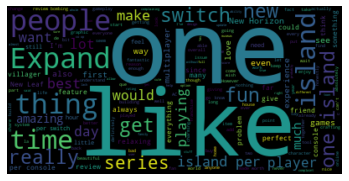

In [28]:
## as suggested by the reference, good and great should be removed as 
## the reviews are positive and would probably include those words anyway
## I'm also going to take out the name of the game and also game as they seem 
## not really needed in this case
stopwords.update(["br", "href","good","great","Animal","Crossing","game","play"]) 

pos = " ".join(review for review in positive.text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

#### And even with the positive, you can see alot of people are not liking the one island thing. 

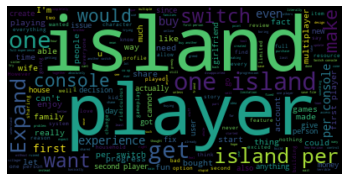

In [29]:
#stopwords = set(stopwords.words('english'))
## gonna remove the name of the game and game again
stopwords.update(["br", "href","Animal","Crossing","game","Nintendo","play"]) 

neg = " ".join(review for review in negative.text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

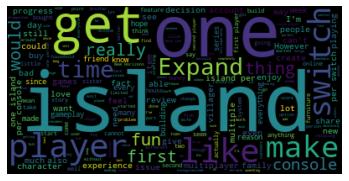

In [30]:
stopwords.update(["br", "href","Animal","Crossing","game","Nintendo","play"]) 

neu = " ".join(review for review in neutral.text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(neu)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

#### They look pretty similar, but as we can see, that one island thing really be taking over. 

#### With that exploring done, I can do some models to classify if a review is positive or not. First I will do random forest because its just a fave. Through the process where the wordcloud look similar, I feel like we might have performance issues, but lets find out! (ﾉ◕ヮ◕)ﾉ*:･ﾟ✧

In [31]:
## I will mostly only need the text and the sentiment so lets seperate that
df = users[["text","sentiment"]]
df.head()


,text,sentiment
0,My gf started playing before me. No option to ...,0
1,"While the game itself is great, really relaxin...",0
2,My wife and I were looking forward to playing ...,-1
3,We need equal values and opportunities for all...,-1
4,BEWARE! If you have multiple people in your h...,-1


In [32]:
## Now lets get that text a bath and clean from all the non-needed punctuation and strip it donn
## to bear bones text
## I couldn't figure out another way to do it so I will be using the methoud in my reference

def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final

df['text'] = df['text'].apply(remove_punctuation)
df['text']



<ipython-input-32-2ab35a05157a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       My gf started playing before me No option to c...
1       While the game itself is great, really relaxin...
2       My wife and I were looking forward to playing ...
3       We need equal values and opportunities for all...
4       BEWARE  If you have multiple people in your ho...
                              ...                        
2994    1 Island for console limitationI cannot play t...
2995    Per giocare con figli o fidanzate, mogli o per...
2996    One island per console is a pathetic limitatio...
2997    Even though it seems like a great game with ma...
2998    Game is fantasticNintendo deciding that you ca...
Name: text, Length: 2999, dtype: object

##### Didn't know italian was in there, lets get rid of that one atleast.


In [33]:
df.drop(axis = 0, index = 2995)

,text,sentiment
0,My gf started playing before me No option to c...,0
1,"While the game itself is great, really relaxin...",0
2,My wife and I were looking forward to playing ...,-1
3,We need equal values and opportunities for all...,-1
4,BEWARE If you have multiple people in your ho...,-1
...,...,...
2993,For those who say I don't understand review bo...,-1
2994,1 Island for console limitationI cannot play t...,-1
2996,One island per console is a pathetic limitatio...,-1
2997,Even though it seems like a great game with ma...,-1


#### Now for the test/train sets       ♪☆＼(^０^＼) ♪(／^-^)／☆♪

In [34]:
from sklearn.model_selection import train_test_split

X = df['text']

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

#### Now to make a bag of words model so the different algorithms can understand it

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

### Okay, NOW I can actually start modeling ┌( ಠ_ಠ)┘

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=200)

rfc.fit(X_train_bow,y_train)

y_pred=rfc.predict(X_test_bow)

In [37]:
joined = pd.DataFrame(y_pred,y_test)
joined

,0
sentiment,
-1,1
-1,-1
-1,-1
0,-1
0,-1
...,...
-1,-1
-1,1
1,1


In [38]:
from sklearn.metrics import classification_report

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred)
print('Random Forest Classification report : \n',matrix)

Random Forest Classification report : 
               precision    recall  f1-score   support

          -1       0.76      0.91      0.83       409
           0       0.00      0.00      0.00        73
           1       0.83      0.79      0.81       268

    accuracy                           0.78       750
   macro avg       0.53      0.57      0.55       750
weighted avg       0.71      0.78      0.74       750



C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Not to shabby for the first model(if we ignore the horrible results on neutral), lets have some fun and do another model! Let's try logistic regression like my reference did
### ＼（○＾ω＾○）／

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_bow,y_train)

y_pred2 = lr.predict(X_test_bow)

joined = pd.DataFrame(y_pred2,y_test)
joined

C:\Users\nicol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,0
sentiment,
-1,1
-1,-1
-1,-1
0,1
0,1
...,...
-1,-1
-1,1
1,1


In [40]:
matrix = classification_report(y_test,y_pred2)
print('Logistic Regression Classification report : \n',matrix)

Logistic Regression Classification report : 
               precision    recall  f1-score   support

          -1       0.80      0.86      0.83       409
           0       0.23      0.10      0.14        73
           1       0.80      0.85      0.83       268

    accuracy                           0.78       750
   macro avg       0.61      0.60      0.60       750
weighted avg       0.75      0.78      0.76       750



### A little better, actually was able to catagorize some of the neutrals